## Libraries

In [1]:
# Libraries
import pandas as pd
import geopandas as gpd
from geopandas import GeoDataFrame, GeoSeries
from shapely.geometry import Point, LineString
import matplotlib.pyplot as plt

# Library settings
%matplotlib inline
pd.set_option("display.max_rows",400)
pd.set_option("display.max_columns",100)

## Functions

In [2]:
# Functions

"""
Determine nearest road from Point 'location' and GeoDataFrame 'roads'
"""
def get_nearest_road(roads: GeoDataFrame, location: Point) -> str:
    # Calculate distances of roads to location, select road with minimum distance and retrieve its name
    nearestroad = roads.loc[roads.distance(location).idxmin()]['ROUTE']
    
    return(nearestroad)


"""
Get nearest road from GeoSeries of Point 'locations' and GeoDataFrame 'roads'
"""
def get_nearest_roads(roads: GeoDataFrame, locations: GeoSeries) -> list:
    nearestroads = [get_nearest_road(roads, location) for location in locations]
    
    return(nearestroads)


"""
Plot GeoDataFrame with 'roads' plus GeoSeries with Point 'locations'
"""
def plot_roads_cars(roads: GeoDataFrame, locations: GeoSeries):
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'aspect':'equal'})
    ax.set_axis_off()
    roads.plot(ax=ax);
    locations.plot(ax=ax, color='red')


"""
Plot GeoDataFrame with 'roads' plus GeoSeries with Point 'locations'
and optionally highlight nearest roads
"""
def plot_roads_cars(roads: GeoDataFrame, locations: GeoSeries, display_nearest: bool=True):
    # Plot settings
    fig, ax = plt.subplots(figsize=(10,10), subplot_kw={'aspect':'equal'})
    ax.set_axis_off()
    
    # Visualize roads and car locations
    roads.plot(ax=ax, linewidth=.6);
    locations.plot(ax=ax, color='red')
    
    # Calculate nearest roads and visualize (if display_nearest True)
    if(display_nearest):
        ax.set_title('Car locations and nearest roads', size = 16)
        nearest_road_names = get_nearest_roads(roads, locations)
        nearest_roads = roads[roads['ROUTE'].isin(nearest_road_names)]
        nearest_roads.plot(ax=ax, color='red')
    else:
        ax.set_title('Car locations', size = 16)

## Settings

In [3]:
# Shapefile manually downloaded from:
# https://www.rijkswaterstaat.nl/apps/geoservices/geodata/dmc/nwb-wegen/geogegevens/shapefile/NWB-light/
roads_shapefile = './data/NWB-light/nwb-light.shp'

# Standard longitude/latitude coordinate reference system
coordinate_system = 'epsg:4326'

## Load roads and car locations

In [4]:
# Load roads shapefile and transform coordinate system
roads = gpd.read_file(roads_shapefile) \
               .to_crs({'init': coordinate_system})

In [5]:
# Define car locations
locations = gpd.GeoSeries([Point(5.0093447, 52.1386131), Point(5.1656536, 52.986452), Point(6.3380367, 52.436074)])

## Find nearest roads

In [6]:
# Get nearest roads for multiple points
get_nearest_roads(roads, locations)

['002', '007', 'N348']

## Visualize

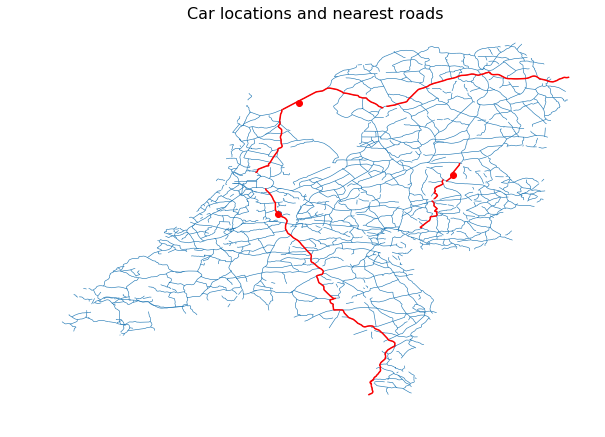

In [7]:
plot_roads_cars(roads, locations, display_nearest=True)